In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D

In [4]:
from tensorflow.keras.models import Model

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Dataset.

In [6]:
cifar10 = tf.keras.datasets.cifar10

In [7]:
# Splitting and scaling the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170498071/170498071 [==============================] - 6s 0us/step


In [8]:
# Shape of data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## Problem :

y_train, y_test is in shape of (N,1) 

It should be -- (N,)

## Solution: 

Flatten

In [9]:
y_train = y_train.flatten()
y_test = y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [10]:
# Creating a function to Check random images from the training dataset.
def image_show(labels):
  n = np.random.randint(0, 50000)
  plt.figure(figsize=(2,2))
  plt.imshow(x_train[n])
  print(f"Label: {labels[y_train[n]]}")

In [11]:
# Labels
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")

Label: dog


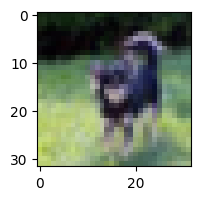

In [12]:
image_show(labels)

## Model Agnostics

In [13]:
#No. of Labels
k = len(set(labels))
print(k)

10


In [14]:
# Architecture of Model
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(k, activation="softmax")(x)


In [15]:
#activating functional api
model = Model(i, x)

In [16]:
#Compiling the Architecture and data
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
#Fitting the data.
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5355 - accuracy: 0.4412 - val_loss: 1.2812 - val_accuracy: 0.5387
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2160 - accuracy: 0.5667 - val_loss: 1.1262 - val_accuracy: 0.6017
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0651 - accuracy: 0.6223 - val_loss: 1.0285 - val_accuracy: 0.6355
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9534 - accuracy: 0.6640 - val_loss: 0.9484 - val_accuracy: 0.6653
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8593 - accuracy: 0.6961 - val_loss: 0.9181 - val_accuracy: 0.6813
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7842 - accuracy: 0.7211 - val_loss: 0.9028 - val_accuracy: 0.6879
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7109 - accuracy: 0.7480 - val_loss: 0.8989 - val_accuracy

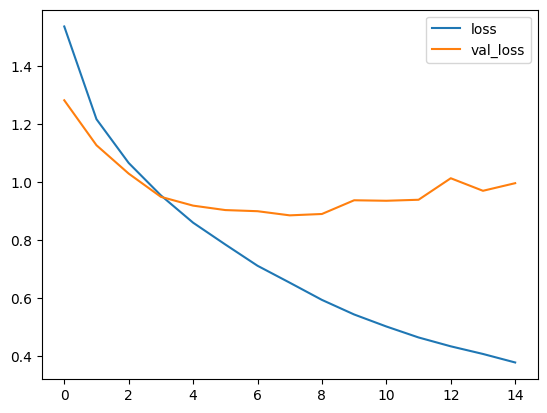

In [18]:
#Plotting the loss curves.
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

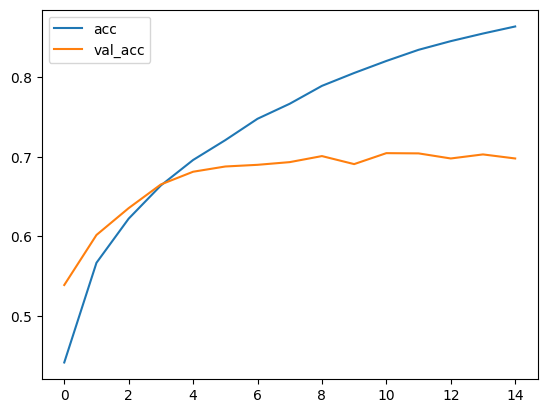

In [19]:
#Plotting the Accuracy
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [20]:
#Confusion metric.
p_test = model.predict(x_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, p_test)
cm

313/313 [==============================] - 1s 2ms/step


array([[741,  10,  55,  25,  23,  11,  17,  12,  64,  42],
       [ 20, 741,  14,  12,   7,   6,  13,   1,  31, 155],
       [ 54,   3, 549,  79, 125,  78,  67,  27,   9,   9],
       [ 13,   6,  67, 505,  86, 183,  81,  30,   9,  20],
       [ 18,   0,  58,  65, 700,  44,  55,  52,   5,   3],
       [  7,   2,  56, 176,  61, 604,  41,  43,   1,   9],
       [  4,   4,  26,  75,  56,  20, 796,   7,   5,   7],
       [ 12,   0,  27,  34,  95,  92,  14, 710,   1,  15],
       [ 52,  31,  20,  20,  14,   6,   8,   1, 818,  30],
       [ 28,  51,  19,  21,   6,  10,  11,  12,  26, 816]])

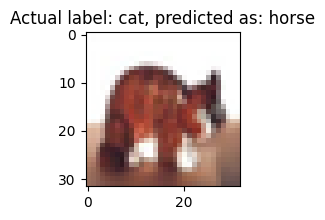

In [21]:
#3 -- 5 and vice versa
#show some missclassification examples
missclasified_idx = np.where(y_test != p_test)[0]
i = np.random.choice(missclasified_idx)
plt.figure(figsize=(2,2))
plt.imshow(x_test[i])
plt.title(f"Actual label: {labels[y_test[i]]}, predicted as: {labels[p_test[i]]}")
plt.show()

In [22]:
# Fit with data Augumentation

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1,
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0328 - accuracy: 0.6450 - val_loss: 0.8651 - val_accuracy: 0.6992
Epoch 2/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.9558 - accuracy: 0.6658 - val_loss: 0.8441 - val_accuracy: 0.7062
Epoch 3/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.9372 - accuracy: 0.6697 - val_loss: 0.8552 - val_accuracy: 0.7062
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9042 - accuracy: 0.6825 - val_loss: 0.8038 - val_accuracy: 0.7182
Epoch 5/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8909 - accuracy: 0.6892 - val_loss: 0.8190 - val_accuracy: 0.7092
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8683 - accuracy: 0.6932 - val_loss: 0.7807 - val_accuracy: 0.7271
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8560 - accuracy: 0.6998 - val_loss: 0.8639 -

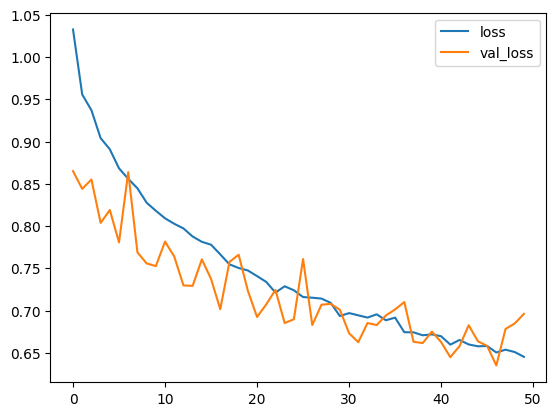

In [23]:
#Plotting the loss curves.
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

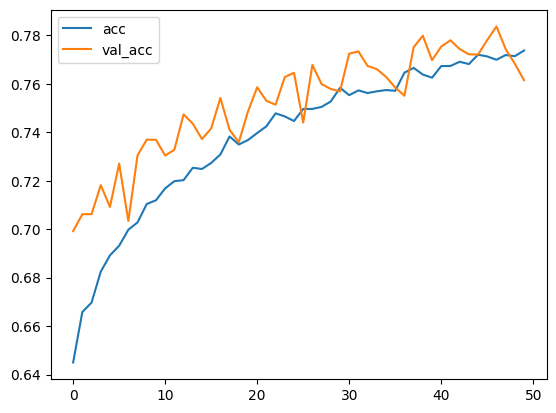

In [24]:
#Plotting the Accuracy
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [25]:
#Confusion metric.
p_test = model.predict(x_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, p_test)
cm

313/313 [==============================] - 1s 4ms/step


array([[814,  20,  13,  18,   6,   1,   8,  12,  51,  57],
       [  7, 893,   2,   6,   0,   2,   4,   2,   9,  75],
       [ 67,   6, 532,  68,  61, 108,  97,  31,   9,  21],
       [ 16,  10,  22, 593,  30, 173,  71,  37,  11,  37],
       [ 20,   6,  36,  72, 646,  26, 113,  65,   4,  12],
       [  6,   5,  17, 146,  22, 705,  34,  46,   3,  16],
       [  8,   6,  11,  56,   9,  23, 856,  10,   8,  13],
       [ 10,   5,   7,  35,  27,  51,   9, 832,   1,  23],
       [ 53,  27,   3,   9,   5,   4,   3,   2, 837,  57],
       [ 13,  48,   3,   6,   1,   3,   3,   8,   8, 907]])

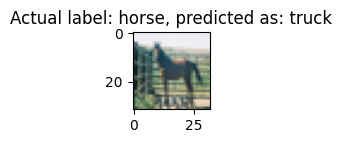

---------------------------------------------




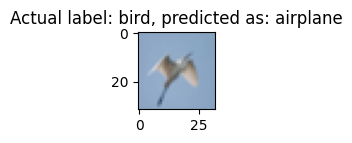

---------------------------------------------




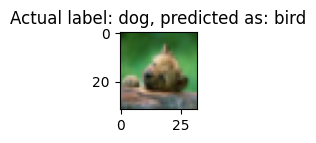

---------------------------------------------




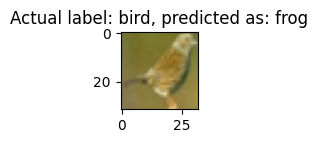

---------------------------------------------




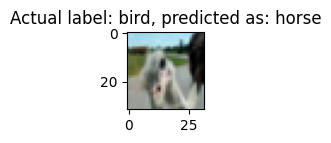

---------------------------------------------




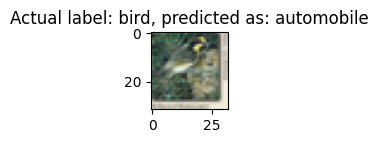

---------------------------------------------




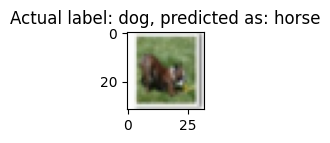

---------------------------------------------




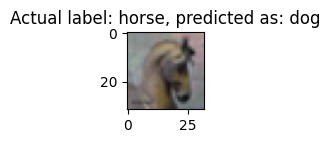

---------------------------------------------




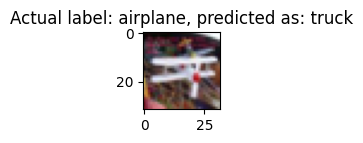

---------------------------------------------




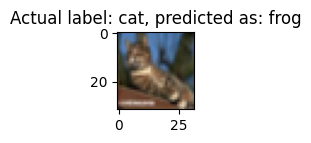

---------------------------------------------




In [28]:
#3 -- 5 and vice versa
#show some missclassification examples
missclasified_idx = np.where(y_test != p_test)[0]
for s in range(0,10):
  i = np.random.choice(missclasified_idx)
  plt.figure(figsize=(1,1))
  plt.imshow(x_test[i])
  plt.title(f"Actual label: {labels[y_test[i]]}, predicted as: {labels[p_test[i]]}")
  plt.show()
  print("---------------------------------------------")
  print("\n")

# Overfitting problem has been resolved in the above model by using data Augumentation 